In [20]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [21]:
# Load the dataset from a CSV file
df = pd.read_csv("clustering_data.csv")

/tmp/ipykernel_1839/3109953751.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clustering_data.csv")


In [22]:
# Display the first few rows of the dataset
df.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [23]:
# Filter the dataset for rows where the state name is 'TELANGANA'
df[df.StateName == 'TELANGANA']

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495
...,...,...,...,...,...,...,...,...,...,...,...
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.0245556
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.5200556
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.2949444
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.4610833


In [24]:
# Create a copy of the dataset
data =df.copy()

In [25]:
# Filter the copied dataset for rows where the state name is 'TELANGANA'
data = data[data.StateName == 'TELANGANA']

In [26]:
# Display the filtered dataset
data

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495
...,...,...,...,...,...,...,...,...,...,...,...
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.0245556
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.5200556
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.2949444
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.4610833


In [27]:
# Display the first 20 rows of the filtered dataset
data.head(20)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495
143,Telangana Circle,Hyderabad Region,Nizamabad Division,Malkapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.2127127,78.549741
144,Telangana Circle,Hyderabad Region,Nizamabad Division,Tujlapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.1894413,78.5477163
145,Telangana Circle,Hyderabad Region,Nizamabad Division,Yadaram B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.3201713,78.3363317
146,Telangana Circle,Hyderabad Region,Nizamabad Division,Ugrawai B.O,503112,BO,Delivery,KAMAREDDY,TELANGANA,18.3258076,78.390802
147,Telangana Circle,Hyderabad Region,Nizamabad Division,Yellappagonda B.O,503112,BO,Delivery,KAMAREDDY,TELANGANA,18.324703,78.3361217


In [28]:
# Further filter the dataset for rows with valid latitude and longitude values
df =df[df.StateName == 'TELANGANA']
df = df.dropna(subset=['Latitude', 'Longitude'])

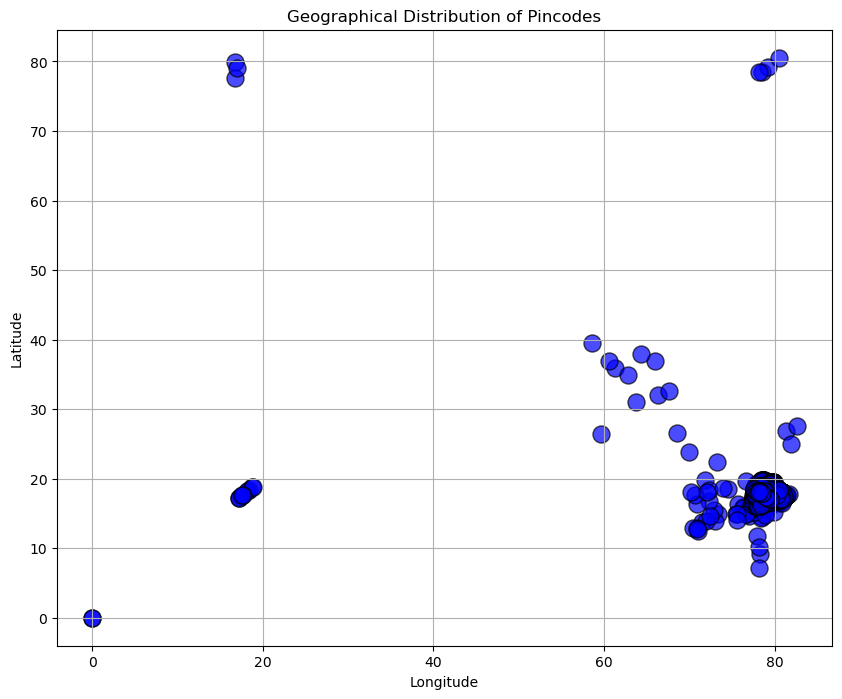

In [29]:
# Visualize the geographical distribution of pincodes
import matplotlib.pyplot as plt
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

pincodes = df['Pincode']
lats = df['Latitude']
lons = df['Longitude']

plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, color='blue', edgecolors='black', s=150, marker='o', alpha=0.7)

plt.title('Geographical Distribution of Pincodes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

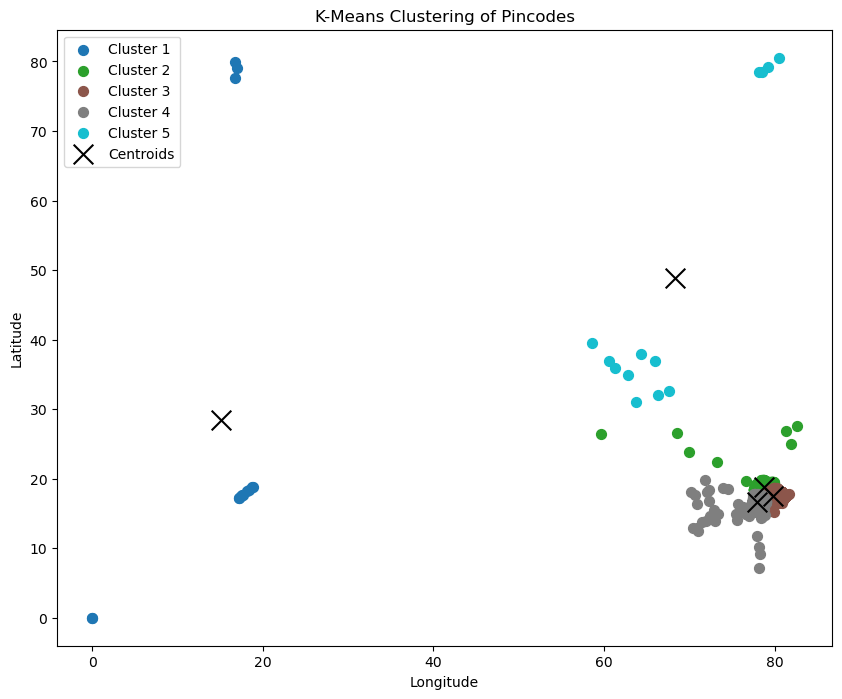

In [30]:
# Implement K-Means clustering and visualize the clusters
import numpy as np
import matplotlib.pyplot as plt

def kmeans(data, k, max_iter=10000, tol=0.0000001):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]

        for point in data:
            dist = np.sum((point - centroids) ** 2, axis=1)
            clusters[np.argmin(dist)].append(point)

        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, clusters

k = 5

# Extract only the numerical columns (Latitude and Longitude) as a NumPy array
# Ensure Latitude and Longitude columns are numeric
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Drop rows with NaN values in Latitude or Longitude
data = data.dropna(subset=['Latitude', 'Longitude'])

# Extract only the numerical columns (Latitude and Longitude) as a NumPy array
data_array = data[['Latitude', 'Longitude']].to_numpy()

# Perform K-Means clustering
centroids, clusters = kmeans(data_array, k)

# Dynamically generate a list of colors to match the number of clusters
colors = plt.cm.get_cmap('tab10', k).colors  # Use a colormap to generate distinct colors
plt.figure(figsize=(10, 8))

for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if cluster.size > 0:
        plt.scatter(cluster[:, 1], cluster[:, 0], color=colors[i], s=50, label=f'Cluster {i+1}')

plt.scatter(centroids[:, 1], centroids[:, 0], color='black', marker='x', s=200, label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('K-Means Clustering of Pincodes')
plt.show()

In [31]:
# Display the clusters
cluster

array([[78.5483395, 78.5483395],
       [36.8964   , 65.9869   ],
       [37.9645   , 64.3698   ],
       [39.5698   , 58.6359   ],
       [35.8968   , 61.25369  ],
       [36.8968   , 60.5698   ],
       [30.9687   , 63.6958   ],
       [34.8569   , 62.8547   ],
       [31.9687   , 66.3698   ],
       [32.6589   , 67.5698   ],
       [79.2704853, 79.2704853],
       [80.54017  , 80.54017  ],
       [78.4701667, 78.1361389]])

In [32]:
# Display the list of clusters
clusters

[[array([18.318915, 18.318915]),
  array([18.1690283, 18.1690283]),
  array([17.244675, 17.244675]),
  array([18.7765966, 18.7765966]),
  array([0., 0.]),
  array([18.8472933, 18.8472933]),
  array([17.4879696, 17.4879696]),
  array([0., 0.]),
  array([77.6352808, 16.7721147]),
  array([17.2252529, 17.2252529]),
  array([79.9879866, 16.763315 ]),
  array([79., 17.]),
  array([17.6688012, 17.6688012]),
  array([17.59606, 17.59606])],
 [array([18.6845544, 78.0773742]),
  array([18.5329923, 77.618717 ]),
  array([18.5329923, 77.618717 ]),
  array([18.3096558, 77.9466324]),
  array([18.2108201, 78.4853495]),
  array([18.2127127, 78.549741 ]),
  array([18.1894413, 78.5477163]),
  array([18.3201713, 78.3363317]),
  array([18.3258076, 78.390802 ]),
  array([18.324703 , 78.3361217]),
  array([18.3212004, 78.4365975]),
  array([18.1745669, 78.1611606]),
  array([18.22808  , 78.1813655]),
  array([18.5170016, 77.7086999]),
  array([18.1057875, 78.0782538]),
  array([18.2258833, 77.967685 ]),
  a

In [33]:
# Display the centroids of the clusters
centroids

array([[28.42556138, 15.13357297],
       [18.73253598, 78.7461783 ],
       [17.4563015 , 79.83330568],
       [16.71091158, 77.87578091],
       [48.80820473, 68.29240952]])

In [34]:
# Calculate and visualize the SSE for different values of k using the Elbow Method
import numpy as np
import matplotlib.pyplot as plt

def sse_kmeans(data, k, max_iter=100):
    centroids, clusters = kmeans(data, k, max_iter)
    sse = sum(np.sum((np.array(cluster) - centroids[i]) ** 2) for i, cluster in enumerate(clusters))
    return sse

k_values = range(1, 11)
sse_values = [sse_kmeans(data, k) for k in k_values]

plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

KeyError: "None of [Index([2893], dtype='int64')] are in the [columns]"

In [ ]:
# Placeholder for additional code or analysis